In [19]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
%matplotlib inline
import scipy.stats as stats

In [3]:
# Import the olympic athletes dataset
athlete_data = pd.read_csv('../Resources/athlete_events_csv.csv')
athlete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Concat,Season,City,Sport,Event,Medal,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,CHN1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,427000000000
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,CHN2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,8560000000000
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,NED1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,259000000000
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,NED1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,259000000000
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,NED1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,358000000000


In [5]:
#Filter for athletes who have won gold medals
athlete_gold_data = athlete_data.loc[athlete_data['Medal'] == 'Gold']
athlete_gold_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Concat,Season,City,Sport,Event,Medal,GDP
33,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,NOR1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,131000000000
46,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,NOR2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,195000000000
49,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,NOR2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,195000000000
51,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,NOR2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,345000000000
52,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,NOR2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,463000000000


In [6]:
#Number of gold medals per country for each year of the Olympics
gold_medals_count = athlete_gold_data.groupby('Concat')['Games'].count()
gold_medals_count

Concat
ALG1992     1
ALG1996     2
ALG2000     1
ALG2012     1
ARG2004    28
           ..
VEN1968     1
VEN2012     1
ZIM1980    15
ZIM2004     1
ZIM2008     1
Name: Games, Length: 623, dtype: int64

In [7]:
#GDP for each country that have won gold medals throughout the years.
gdp = athlete_gold_data.groupby('Concat')['GDP'].mean()
gdp

Concat
ALG1992     48003298223
ALG1996     46941496780
ALG2000     54790245601
ALG2012    209000000000
ARG2004    165000000000
               ...     
VEN1968     11343444444
VEN2012    381000000000
ZIM1980      6678868200
ZIM2004      5805598400
ZIM2008      4415702800
Name: GDP, Length: 623, dtype: int64

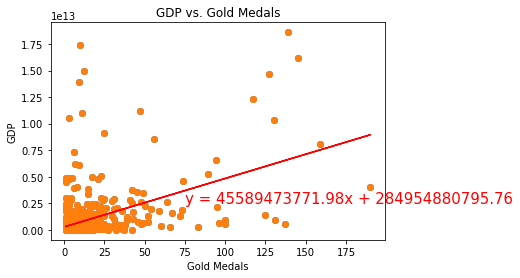

The r value is 0.48339650721138233.


In [8]:
x_values = gold_medals_count
y_values = gdp
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,2500000000000),fontsize=15,color="red")
plt.xlabel('Gold Medals')
plt.ylabel('GDP')
plt.title('GDP vs. Gold Medals')
plt.show()
print(f'The r value is {rvalue}.')

In [9]:
#Filter for males only
male_data = athlete_data.loc[athlete_data['Sex'] == 'M']
male_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Concat,Season,City,Sport,Event,Medal,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,CHN1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,427000000000
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,CHN2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,8560000000000
8,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,USA1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,6540000000000
9,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,USA1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,6540000000000
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,USA1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,6540000000000


In [10]:
#Males who have won gold medals
male_gold_data = male_data.loc[male_data['Medal'] == 'Gold']
male_gold_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Concat,Season,City,Sport,Event,Medal,GDP
33,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,NOR1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,131000000000
46,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,NOR2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,195000000000
49,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,NOR2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,195000000000
51,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,NOR2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,345000000000
76,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,1960,NOR1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",Gold,5163271598


In [11]:
#Number of male gold medals per country for each year of the Olympics Games
male_gold_medals = male_gold_data.groupby('Concat')['Games'].count()
male_gold_medals

Concat
ALG1996     2
ALG2012     1
ARG2004    28
ARG2008    20
ARG2012     1
           ..
UZB2008     1
UZB2012     1
UZB2016     4
VEN1968     1
VEN2012     1
Name: Games, Length: 545, dtype: int64

In [12]:
#GDP for countries in male focused data
male_gdp = male_gold_data.groupby('Concat')['GDP'].mean()
male_gdp

Concat
ALG1996     46941496780
ALG2012    209000000000
ARG2004    165000000000
ARG2008    362000000000
ARG2012    546000000000
               ...     
UZB2008     29549438884
UZB2012     51821573338
UZB2016     67220335570
VEN1968     11343444444
VEN2012    381000000000
Name: GDP, Length: 545, dtype: int64

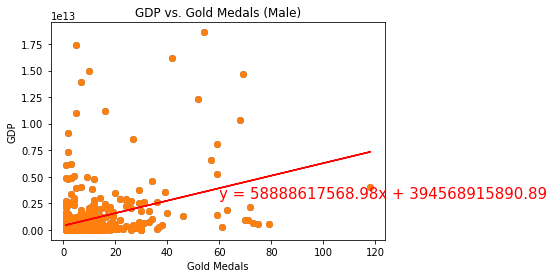

The r-value is 0.36417906216757046.


In [13]:
x_values = male_gold_medals
y_values = male_gdp
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,3000000000000),fontsize=15,color="red")
plt.xlabel('Gold Medals')
plt.ylabel('GDP')
plt.title('GDP vs. Gold Medals (Male)')
plt.show()
print(f'The r-value is {rvalue}.')

In [23]:
#Filter for female data
female_data = athlete_data.loc[athlete_data['Sex'] == 'F']
female_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Concat,Season,City,Sport,Event,Medal,GDP
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,NED1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,259000000000
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,NED1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,259000000000
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,NED1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,358000000000
5,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,NED1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,358000000000
6,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,NED1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,374000000000


In [24]:
#Filter female data for gold medalists
female_gold_data = female_data.loc[female_data['Medal'] == 'Gold']
female_gold_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Concat,Season,City,Sport,Event,Medal,GDP
52,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,NOR2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,463000000000
1097,832,Nicola Virginia Adams,F,29.0,164.0,51.0,Great Britain,GBR,2012 Summer,2012,GBR2012,Summer,London,Boxing,Boxing Women's Flyweight,Gold,2660000000000
1098,832,Nicola Virginia Adams,F,33.0,164.0,51.0,Great Britain,GBR,2016 Summer,2016,GBR2016,Summer,Rio de Janeiro,Boxing,Boxing Women's Flyweight,Gold,2650000000000
1114,846,Valerie Kasanita Adams-Vili (-Price),F,23.0,193.0,120.0,New Zealand,NZL,2008 Summer,2008,NZL2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,Gold,133000000000
1115,846,Valerie Kasanita Adams-Vili (-Price),F,27.0,193.0,120.0,New Zealand,NZL,2012 Summer,2012,NZL2012,Summer,London,Athletics,Athletics Women's Shot Put,Gold,176000000000


In [15]:
#Number of female gold medals per country for each year of the Olympics
female_gold_medals = female_gold_data.groupby('Concat')['Games'].count()
female_gold_medals

Concat
ALG1992     1
ALG2000     1
ARG2016     2
AUS1960     1
AUS1964     2
           ..
USA2016    85
UZB1994     1
ZIM1980    15
ZIM2004     1
ZIM2008     1
Name: Games, Length: 380, dtype: int64

In [54]:
#GDP for female data countries 
female_gdp = female_gold_data.groupby('Concat')['GDP'].mean()
female_gdp

Concat
ALG1992       48003298223
ALG2000       54790245601
ARG2016      545000000000
AUS1960       18593347519
AUS1964       23787658192
                ...      
USA2016    18600000000000
UZB1994       12899156991
ZIM1980        6678868200
ZIM2004        5805598400
ZIM2008        4415702800
Name: GDP, Length: 380, dtype: int64

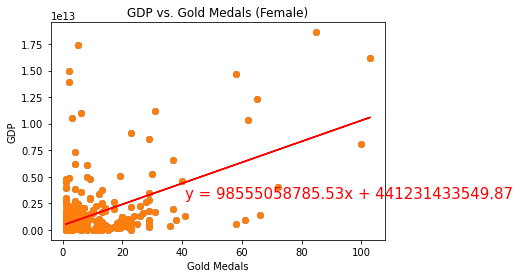

The r-value is 0.5187506971691347.


In [65]:
x_values = female_gold_medals
y_values = female_gdp
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(41,3000000000000),fontsize=15,color="red")
plt.xlabel('Gold Medals')
plt.ylabel('GDP')
plt.title('GDP vs. Gold Medals (Female)')
plt.show()
print(f'The r-value is {rvalue}.')

In [43]:
#Total number of partcipants for each country for each year of the Olympics.
total_participants = athlete_data.groupby('Concat')['Team'].count()

#Total number of gold medals for each country for each year of the Olympics.
total_gold = athlete_gold_data.groupby('Concat')['Team'].count()

#Percentage of participants earning gold medals for each country for each year of the Olympics.
percentage_gold = total_gold/total_participants
percentage_gold = percentage_gold.dropna()

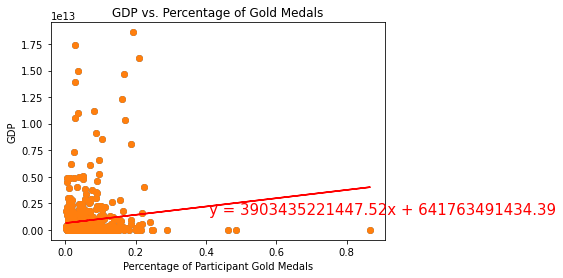

The r-value is 0.11794337742170156.


In [44]:
x_values = percentage_gold
y_values = gdp
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.41,1500000000000),fontsize=15,color="red")
plt.xlabel('Percentage of Participant Gold Medals')
plt.ylabel('GDP')
plt.title('GDP vs. Percentage of Gold Medals')
plt.show()
print(f'The r-value is {rvalue}.')

In [46]:
#Total number of male partcipants for each country for each year of the Olympics.
male_participants = male_data.groupby('Concat')['Team'].count()

#Total number of gold medals for each country for each year of the Olympics.
male_gold = male_gold_data.groupby('Concat')['Team'].count()

#Percentage of participants earning gold medals for each country for each year of the Olympics.
percentage_male_gold = male_gold/male_participants
percentage_male_gold = percentage_male_gold.dropna()

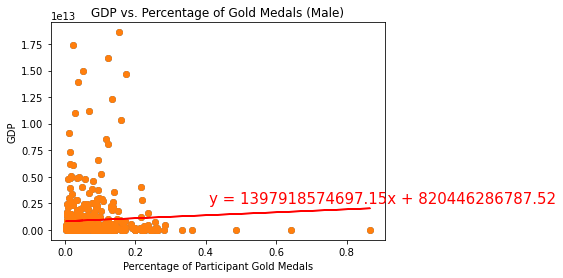

The r-value is 0.04762093857773323.


In [47]:
x_values = percentage_male_gold
y_values = male_gdp
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.41,2500000000000),fontsize=15,color="red")
plt.xlabel('Percentage of Participant Gold Medals')
plt.ylabel('GDP')
plt.title('GDP vs. Percentage of Gold Medals (Male)')
plt.show()
print(f'The r-value is {rvalue}.')

In [52]:
#Total number of female partcipants for each country for each year of the Olympics.
female_participants = female_data.groupby('Concat')['Team'].count()

#Total number of gold medals for each country for each year of the Olympics.
female_gold = female_gold_data.groupby('Concat')['Team'].count()

#Percentage of participants earning gold medals for each country for each year of the Olympics.
percentage_female_gold = female_gold/male_participants
percentage_female_gold = percentage_female_gold.dropna()

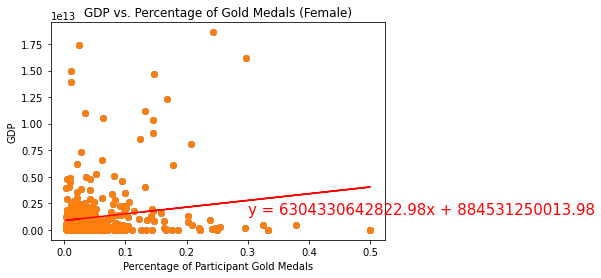

The r-value is 0.170550217918905.


In [55]:
x_values = percentage_female_gold
y_values = female_gdp
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.30,1500000000000),fontsize=15,color="red")
plt.xlabel('Percentage of Participant Gold Medals')
plt.ylabel('GDP')
plt.title('GDP vs. Percentage of Gold Medals (Female)')
plt.show()
print(f'The r-value is {rvalue}.')

In [35]:
#Total number of male partcipants for each year of the Olympics.
male_year_participants = male_data.groupby('Year')['Team'].count()

#Total number of gold medals for each year of the Olympics.
male_year_gold = male_gold_data.groupby('Year')['Team'].count()

#Percentage of participants earning gold medals for each year of the Olympics.
percent_year_gold_male = male_year_gold/male_year_participants

#Total number of partcipants for each year of the Olympics.
total_year_participants = athlete_data.groupby('Year')['Team'].count()

#Total number of gold medals for each year of the Olympics.
total_year_gold = athlete_gold_data.groupby('Year')['Team'].count()

#Percentage of participants earning gold medals for each year of the Olympics.
percentage_year_gold = total_year_gold/total_year_participants
percentage_year_gold = percentage_year_gold.dropna()

In [36]:
#T-Test comparing percentage of gold medals overall and percentage of gold medals won by male atheletes. 
population = percentage_year_gold
sample = percent_year_gold_male
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-1.7251401541630382, pvalue=0.09992250188053525)

In [41]:
#Total number of female partcipants for each year of the Olympics.
female_year_participants = female_data.groupby('Year')['Team'].count()

#Total number of gold medals for each year of the Olympics.
female_year_gold = female_gold_data.groupby('Year')['Team'].count()

#Percentage of participants earning gold medals for each year of the Olympics.
percent_year_gold_female = female_year_gold/female_year_participants

#Total number of partcipants for each year of the Olympics.
total_year_participants = athlete_data.groupby('Year')['Team'].count()

#Total number of gold medals for each year of the Olympics.
total_year_gold = athlete_gold_data.groupby('Year')['Team'].count()

#Percentage of participants earning gold medals for each year of the Olympics.
percentage_year_gold = total_year_gold/total_year_participants
percentage_year_gold = percentage_year_gold.dropna()

Year
1960    0.034303
1964    0.035536
1968    0.033577
1972    0.029600
1976    0.039535
1980    0.045796
1984    0.042752
1988    0.031262
1992    0.036106
1994    0.037263
1996    0.044483
1998    0.040311
2000    0.048355
2002    0.039426
2004    0.049566
2006    0.040164
2008    0.049660
2010    0.039554
2012    0.049487
2014    0.041461
2016    0.049735
Name: Team, dtype: float64

In [38]:
#T-Test comparing percentage of gold medals overall and percentage of gold medals won by female atheletes. 
population = percentage_year_gold
sample = percent_year_gold_female
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=2.2433708531343024, pvalue=0.036355965634313515)

In [ ]:
#Observations:
#1 - We can see that there is a moderate correlation between the number of gold medals won and gdp, based on an r-value of 0.48.
#2 - For female athletes, there is a correlation coefficient of 0.52 which indicates that perhaps there is a stronger correlation for females athletes between the number of gold medals won and their country's gdp.  
#3 - On the other hand, a correlation coefficient of 0.36 suggests that there may not be as strong of a correlation for male athletes between the number of gold medals won and gdp. 

#4 - Overall, there does not seem to be a strong correlation between the percentage of participants who won gold medals for their country and the country's gdp. This leads us to conclude that perhaps gdp does not have a great impact on a country's performance at the Olympics.

#5 Based on a p-value of 0.0999, we conclude that there is not a statistically significant difference between the percentage of gold medals won by male atheletes compared to the overall percentage of gold medals won. 
#6 Based on a p-value of 0.0364, we conclude there is a statistically significant difference between the percentage of gold medals won by female atheletes compared to the overall percentage of gold medals won. 